#  Comparative Study of Visualization Techniques in Terms of Robustness by Noise-induced Perturbations on Cytometry Data
### Luke Winters, Attila Benczik

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import mpl_toolkits.mplot3d 
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from scipy.spatial.distance import pdist
from numpy.linalg import norm
cells = ["cell "+str(i) for i in range(1,7467)]
proteins = ["praf","pmek","plcg","PIP2","PIP3","p44/42","pakts473",
            "PKA","PKC","P38","pjnk"]
            
file =pd.read_csv("FlowCytometryData.csv")

dataOG = file.loc[:,proteins]

data0000 = file.loc[:,proteins]

data0100 = file.loc[:,proteins]

data0200 = file.loc[:,proteins]

data0500 = file.loc[:,proteins]

data1000 = file.loc[:,proteins]

data1500 = file.loc[:,proteins]

data2000 = file.loc[:,proteins]

def gaussian_noise(x,mu,std): 
    np.random.seed(3)
    noise = np.random.normal(mu, std, size = x.shape) 

    x_noisy = x + noise 

    return x_noisy 


print(dataOG.head())

prafMean=6.366118e-06
prafSD=2.475281e+02

pmekMean=-3.194519e-05
pmekSD=3.770562e+02

plcgMean=3.472676e-06
plcgSD=1.738598e+02

PIP2Mean=2.002545e-05
PIP2SD=2.993475e+02

PIP3Mean=1.352197e-06
PIP3SD=4.304816e+01

p4442SD=4.582672e+01
p4442Mean=2.158926e-06

pakts473SD=1.377662e+02
pakts473Mean=5.111974e-06

PKASD=6.444593e+02
PKAMean=-3.846262e-05

PKCSD=9.287002e+01
PKCMean=-3.486526e-06

P38SD=4.947688e+02
P38Mean=-7.795666e-06

pjnkSD=2.156606e+02
pjnkMean=-2.697562e-06

       praf       pmek      plcg      PIP2       PIP3     p44/42  pakts473  \
0 -97.67193 -132.18100 -46.03364 -132.8207  31.765040 -20.021190 -64.16721   
1 -88.17193 -128.88100 -42.55364 -134.3207 -18.904960  -8.031193 -48.66721   
2 -64.67193 -101.28100 -40.25364 -140.9207 -14.034960 -11.731190 -48.66721   
3 -51.07193  -62.58096 -31.75364 -137.6207 -25.744960 -20.801190 -69.36721   
4 -90.37193 -125.58100 -49.66364 -141.3907  -2.234962  -5.531193 -35.06721   

         PKA       PKC       P38       pjnk  
0 -211.75860 -13.34166  -90.1145 -33.267500  
1 -273.75860 -26.97166 -118.5145 -11.767500  
2 -222.75860 -18.94166 -103.1145 -53.767500  
3  -97.75859 -16.64166 -106.4145 -50.167500  
4 -320.75860 -25.68166 -109.3145   8.032497  


In [2]:
StandardDeviations=0.1


In [3]:
data0100.praf=gaussian_noise(data0100.praf,prafMean,prafSD*StandardDeviations) 

data0100.pmek	=gaussian_noise(data0100.pmek,pmekMean,pmekSD*StandardDeviations) 

data0100.plcg=gaussian_noise(data0100.plcg,plcgMean,plcgSD*StandardDeviations) 

data0100.PIP2=gaussian_noise(data0100.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data0100.PIP3=gaussian_noise(data0100.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data0100.iloc[:,[5]]=gaussian_noise(data0100.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data0100.pakts473=gaussian_noise(data0100.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data0100.PKA=gaussian_noise(data0100.PKA,PKAMean,PKASD*StandardDeviations) 

data0100.PKC=gaussian_noise(data0100.PKC,PKCMean,PKCSD*StandardDeviations) 

data0100.P38=gaussian_noise(data0100.P38,P38Mean,P38SD*StandardDeviations) 

data0100.pjnk=gaussian_noise(data0100.pjnk,pjnkMean,pjnkSD*StandardDeviations) 

In [4]:
StandardDeviations=0.2

In [5]:
data0200.praf=gaussian_noise(data0200.praf,prafMean,prafSD*StandardDeviations) 

data0200.pmek	=gaussian_noise(data0200.pmek,pmekMean,pmekSD*StandardDeviations) 

data0200.plcg=gaussian_noise(data0200.plcg,plcgMean,plcgSD*StandardDeviations) 

data0200.PIP2=gaussian_noise(data0200.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data0200.PIP3=gaussian_noise(data0200.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data0200.iloc[:,[5]]=gaussian_noise(data0200.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data0200.pakts473=gaussian_noise(data0200.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data0200.PKA=gaussian_noise(data0200.PKA,PKAMean,PKASD*StandardDeviations) 

data0200.PKC=gaussian_noise(data0200.PKC,PKCMean,PKCSD*StandardDeviations) 

data0200.P38=gaussian_noise(data0200.P38,P38Mean,P38SD*StandardDeviations) 

data0200.pjnk=gaussian_noise(data0200.pjnk,pjnkMean,pjnkSD*StandardDeviations)

In [6]:
StandardDeviations=0.5

In [7]:
data0500.praf=gaussian_noise(data0500.praf,prafMean,prafSD*StandardDeviations) 

data0500.pmek	=gaussian_noise(data0500.pmek,pmekMean,pmekSD*StandardDeviations) 

data0500.plcg=gaussian_noise(data0500.plcg,plcgMean,plcgSD*StandardDeviations) 

data0500.PIP2=gaussian_noise(data0500.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data0500.PIP3=gaussian_noise(data0500.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data0500.iloc[:,[5]]=gaussian_noise(data0500.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data0500.pakts473=gaussian_noise(data0500.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data0500.PKA=gaussian_noise(data0500.PKA,PKAMean,PKASD*StandardDeviations) 

data0500.PKC=gaussian_noise(data0500.PKC,PKCMean,PKCSD*StandardDeviations) 

data0500.P38=gaussian_noise(data0500.P38,P38Mean,P38SD*StandardDeviations) 

data0500.pjnk=gaussian_noise(data0500.pjnk,pjnkMean,pjnkSD*StandardDeviations) 

In [8]:
StandardDeviations=1

In [9]:
data1000.praf=gaussian_noise(data1000.praf,prafMean,prafSD*StandardDeviations) 

data1000.pmek	=gaussian_noise(data1000.pmek,pmekMean,pmekSD*StandardDeviations) 

data1000.plcg=gaussian_noise(data1000.plcg,plcgMean,plcgSD*StandardDeviations) 

data1000.PIP2=gaussian_noise(data1000.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data1000.PIP3=gaussian_noise(data1000.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data1000.iloc[:,[5]]=gaussian_noise(data1000.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data1000.pakts473=gaussian_noise(data1000.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data1000.PKA=gaussian_noise(data1000.PKA,PKAMean,PKASD*StandardDeviations) 

data1000.PKC=gaussian_noise(data1000.PKC,PKCMean,PKCSD*StandardDeviations) 

data1000.P38=gaussian_noise(data1000.P38,P38Mean,P38SD*StandardDeviations) 

data1000.pjnk=gaussian_noise(data1000.pjnk,pjnkMean,pjnkSD*StandardDeviations) 

In [10]:
StandardDeviations=1.5

In [11]:
data1500.praf=gaussian_noise(data1500.praf,prafMean,prafSD*StandardDeviations) 

data1500.pmek	=gaussian_noise(data1500.pmek,pmekMean,pmekSD*StandardDeviations) 

data1500.plcg=gaussian_noise(data1500.plcg,plcgMean,plcgSD*StandardDeviations) 

data1500.PIP2=gaussian_noise(data1500.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data1500.PIP3=gaussian_noise(data1500.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data1500.iloc[:,[5]]=gaussian_noise(data1500.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data1500.pakts473=gaussian_noise(data1500.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data1500.PKA=gaussian_noise(data1500.PKA,PKAMean,PKASD*StandardDeviations) 

data1500.PKC=gaussian_noise(data1500.PKC,PKCMean,PKCSD*StandardDeviations) 

data1500.P38=gaussian_noise(data1500.P38,P38Mean,P38SD*StandardDeviations) 

data1500.pjnk=gaussian_noise(data1500.pjnk,pjnkMean,pjnkSD*StandardDeviations) 

In [12]:
StandardDeviations=2

In [13]:
data2000.praf=gaussian_noise(data2000.praf,prafMean,prafSD*StandardDeviations) 

data2000.pmek	=gaussian_noise(data2000.pmek,pmekMean,pmekSD*StandardDeviations) 

data2000.plcg=gaussian_noise(data2000.plcg,plcgMean,plcgSD*StandardDeviations) 

data2000.PIP2=gaussian_noise(data2000.PIP2,PIP2Mean,PIP2SD*StandardDeviations) 

data2000.PIP3=gaussian_noise(data2000.PIP3,PIP3Mean,PIP3SD*StandardDeviations) 

data2000.iloc[:,[5]]=gaussian_noise(data2000.iloc[:,[5]],p4442Mean,p4442SD*StandardDeviations) 

data2000.pakts473=gaussian_noise(data2000.pakts473,pakts473Mean,pakts473SD*StandardDeviations) 

data2000.PKA=gaussian_noise(data2000.PKA,PKAMean,PKASD*StandardDeviations) 

data2000.PKC=gaussian_noise(data2000.PKC,PKCMean,PKCSD*StandardDeviations) 

data2000.P38=gaussian_noise(data2000.P38,P38Mean,P38SD*StandardDeviations) 

data2000.pjnk=gaussian_noise(data2000.pjnk,pjnkMean,pjnkSD*StandardDeviations) 

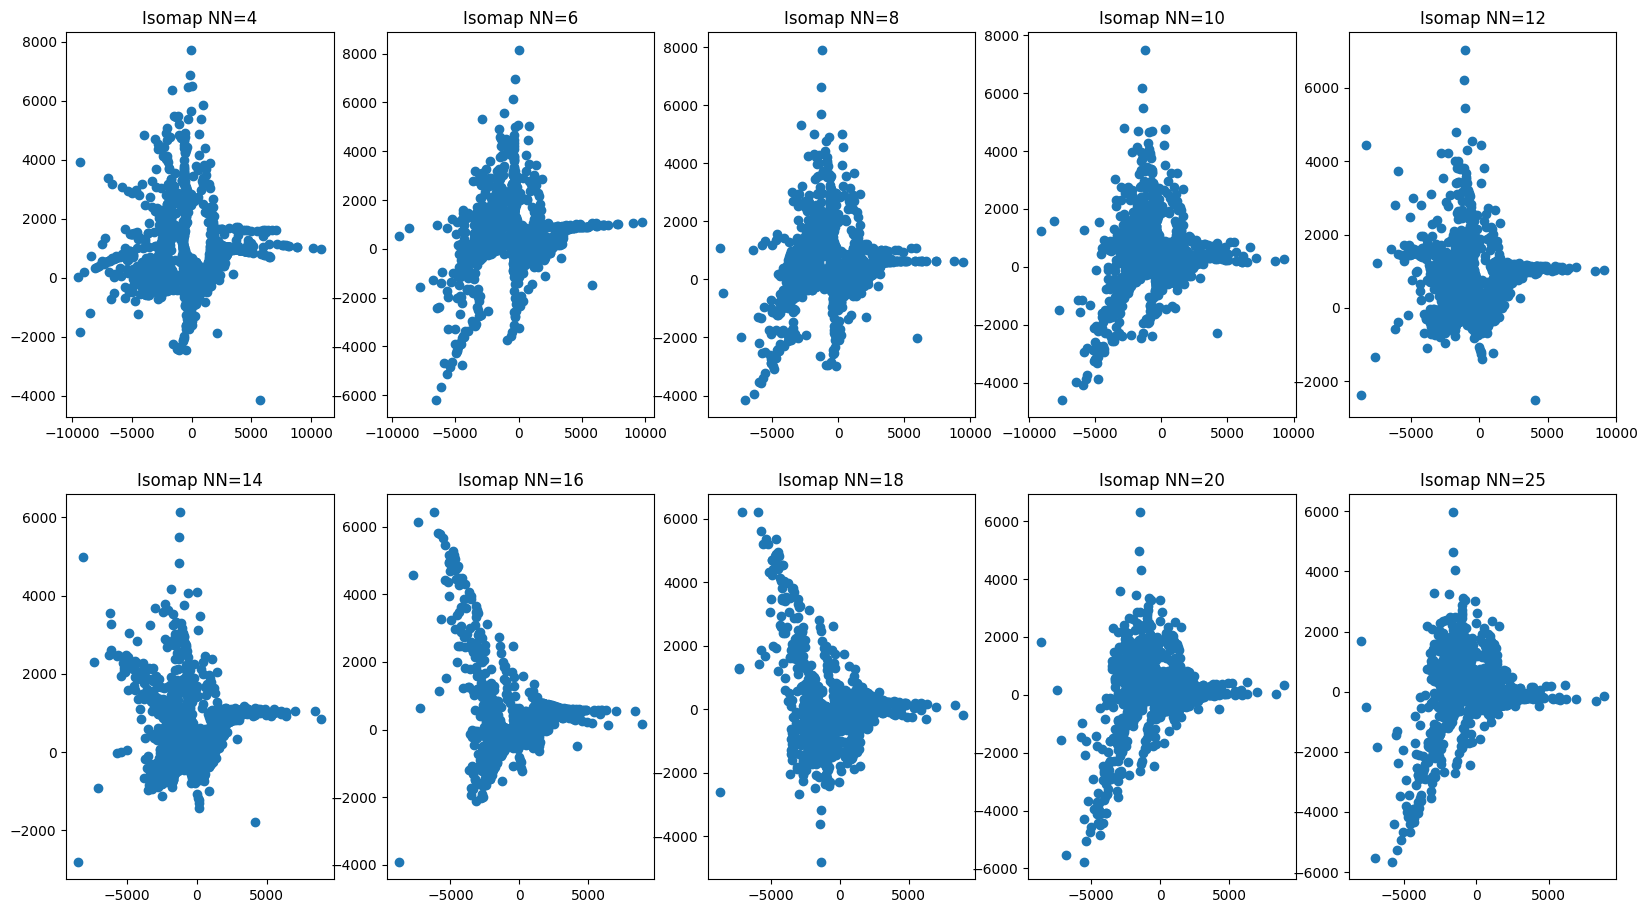

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import numpy as np

# Define parameters
num_components = 2
num_neighbours_list = [4, 6, 8, 10, 12, 14, 16, 18, 20, 25]
num_neighbour = 0

# Loop over num_neighbours_list and create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 11))

for i, ax in enumerate(axes.flatten()):
    if i < len(num_neighbours_list):
        # Fit Isomap model with current number of neighbours
        num_neighbour = num_neighbours_list[i]
        model = Isomap(n_components=num_components, n_neighbors=num_neighbour)
        X_transformed = model.fit_transform(dataOG)
        X_transformedOG = X_transformed.transpose()

        # Plot the results
        ax.scatter(X_transformedOG[0], X_transformedOG[1])
        ax.set_title(f"Isomap NN={num_neighbour}")
        ax.axis("tight")

plt.show()


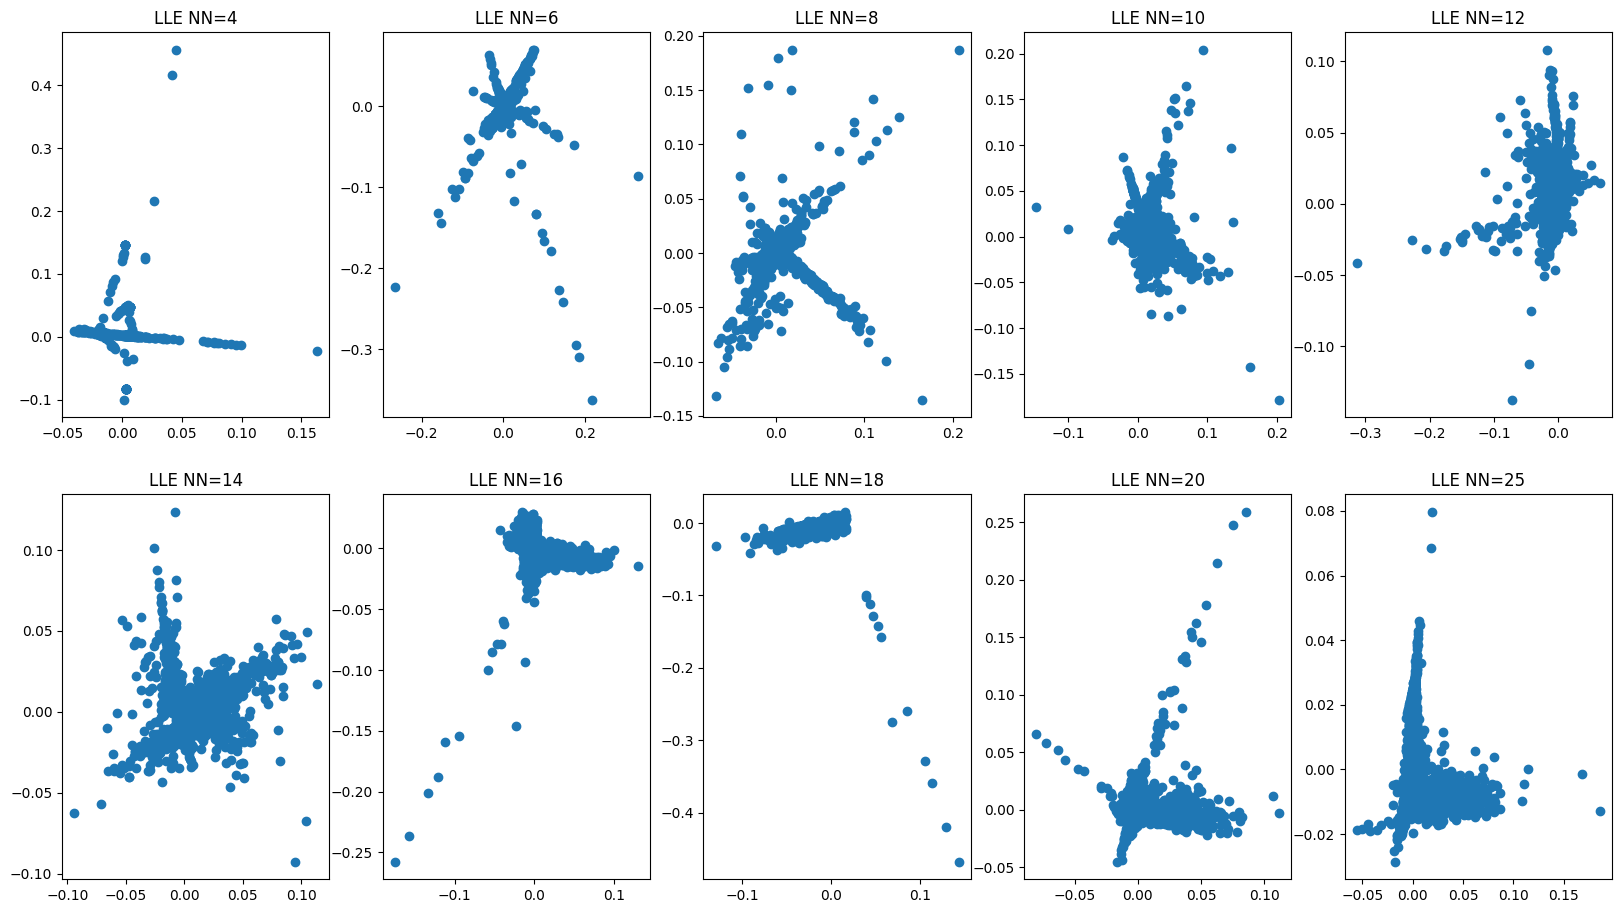

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np

# Define parameters
num_components = 2
num_neighbours_list = [4, 6, 8, 10,12, 14,16, 18, 20, 25]
num_neighbour = 0

# Loop over num_neighbours_list and create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 11))

for i, ax in enumerate(axes.flatten()):
    if i < len(num_neighbours_list):
        # Fit LLE model with current number of neighbours
        num_neighbour = num_neighbours_list[i]
        modelr = LocallyLinearEmbedding(n_components=num_components, n_neighbors=num_neighbour)
        X_transformedr = modelr.fit_transform(dataOG)
        X_transformedrOG = X_transformedr.transpose()

        # Plot the results
        ax.scatter(X_transformedrOG[0], X_transformedrOG[1])
        ax.set_title(f"LLE NN={num_neighbour}")
        ax.axis("tight")

plt.show()

In [16]:
num_components = 2
num_neighbours = 14
modelr = LocallyLinearEmbedding(n_components=num_components, n_neighbors=num_neighbours)
X_transformedr = modelr.fit_transform(dataOG)
X_transformedrOG = X_transformedr.transpose()
ax.scatter(X_transformedrOG[0], X_transformedrOG[1])
ax.set_title("Local Linear Embedding")
ax.axis("tight")
plt.show()

Text(0.5, 1.0, 'Locally Linear Embedding sd=0.1 (12 sec)')

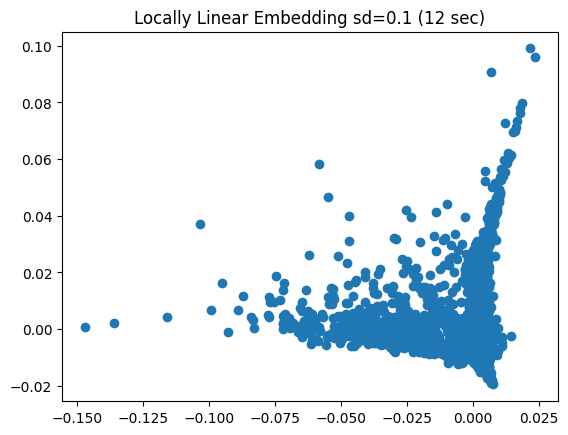

In [17]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data0100)
X_transformedr01=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr01[0],X_transformedr01[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=0.1", t1 - t0))

Text(0.5, 1.0, 'Locally Linear Embedding sd=0.2 (12 sec)')

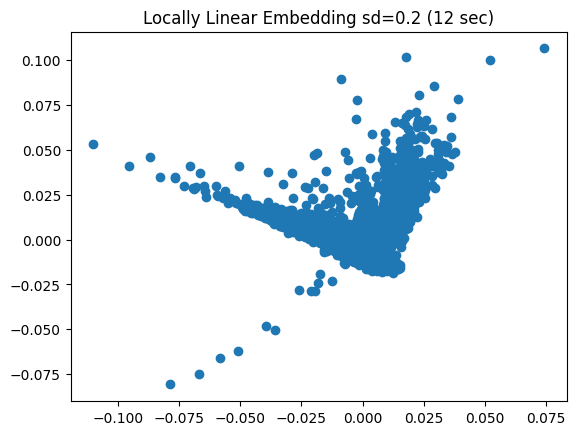

In [18]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data0200)
X_transformedr02=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr02[0],X_transformedr02[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=0.2", t1 - t0))

Text(0.5, 1.0, 'Locally Linear Embedding sd=0.5 (11 sec)')

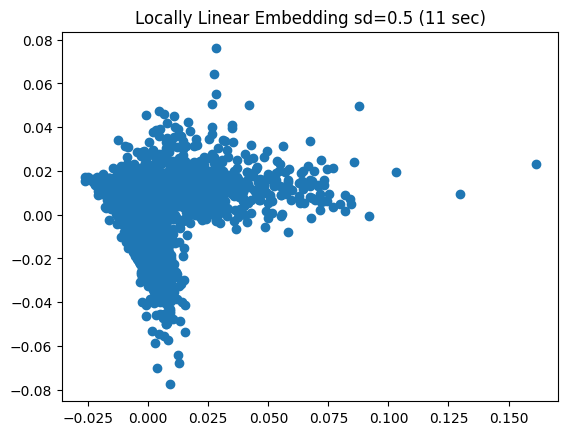

In [19]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data0500)
X_transformedr05=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr05[0],X_transformedr05[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=0.5", t1 - t0))

Text(0.5, 1.0, 'Locally Linear Embedding sd=1.0 (8.1 sec)')

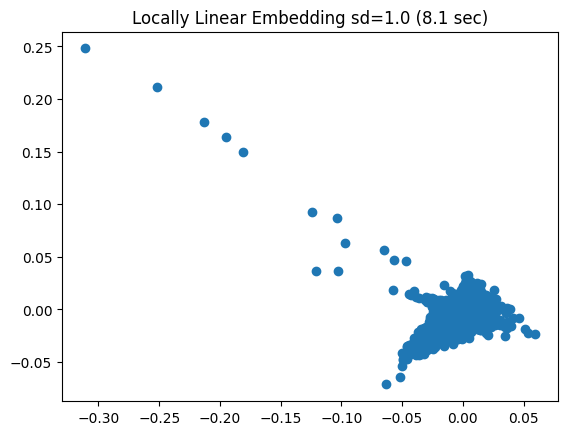

In [20]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data1000)
X_transformedr10=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr10[0],X_transformedr10[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=1.0", t1 - t0))

Text(0.5, 1.0, 'Locally Linear Embedding sd=1.5 (8.4 sec)')

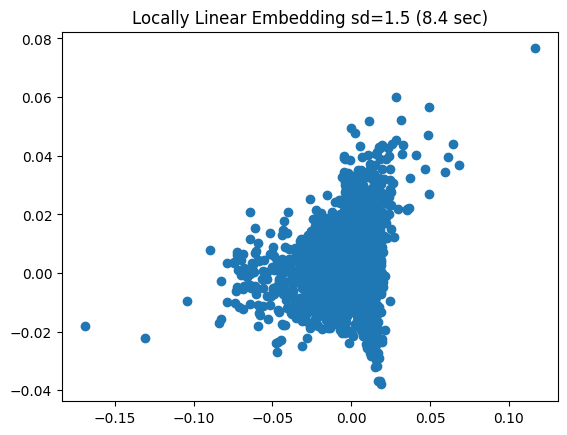

In [21]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data1500)
X_transformedr15=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr15[0],X_transformedr15[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=1.5", t1 - t0))

Text(0.5, 1.0, 'Locally Linear Embedding sd=2.0 (7.7 sec)')

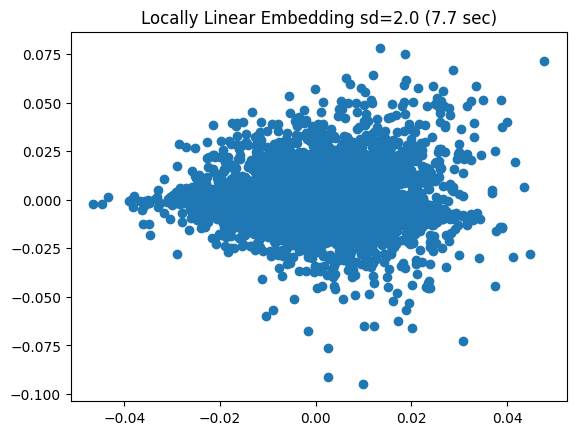

In [22]:
t0 = time()
modelr=LocallyLinearEmbedding(n_components=num_components,n_neighbors=num_neighbour)
X_transformedr = modelr.fit_transform(data2000)
X_transformedr20=X_transformedr.transpose()
t1 = time()
plt.scatter(X_transformedr20[0],X_transformedr20[1])
plt.title("%s (%.2g sec)" % ("Locally Linear Embedding sd=2.0", t1 - t0))

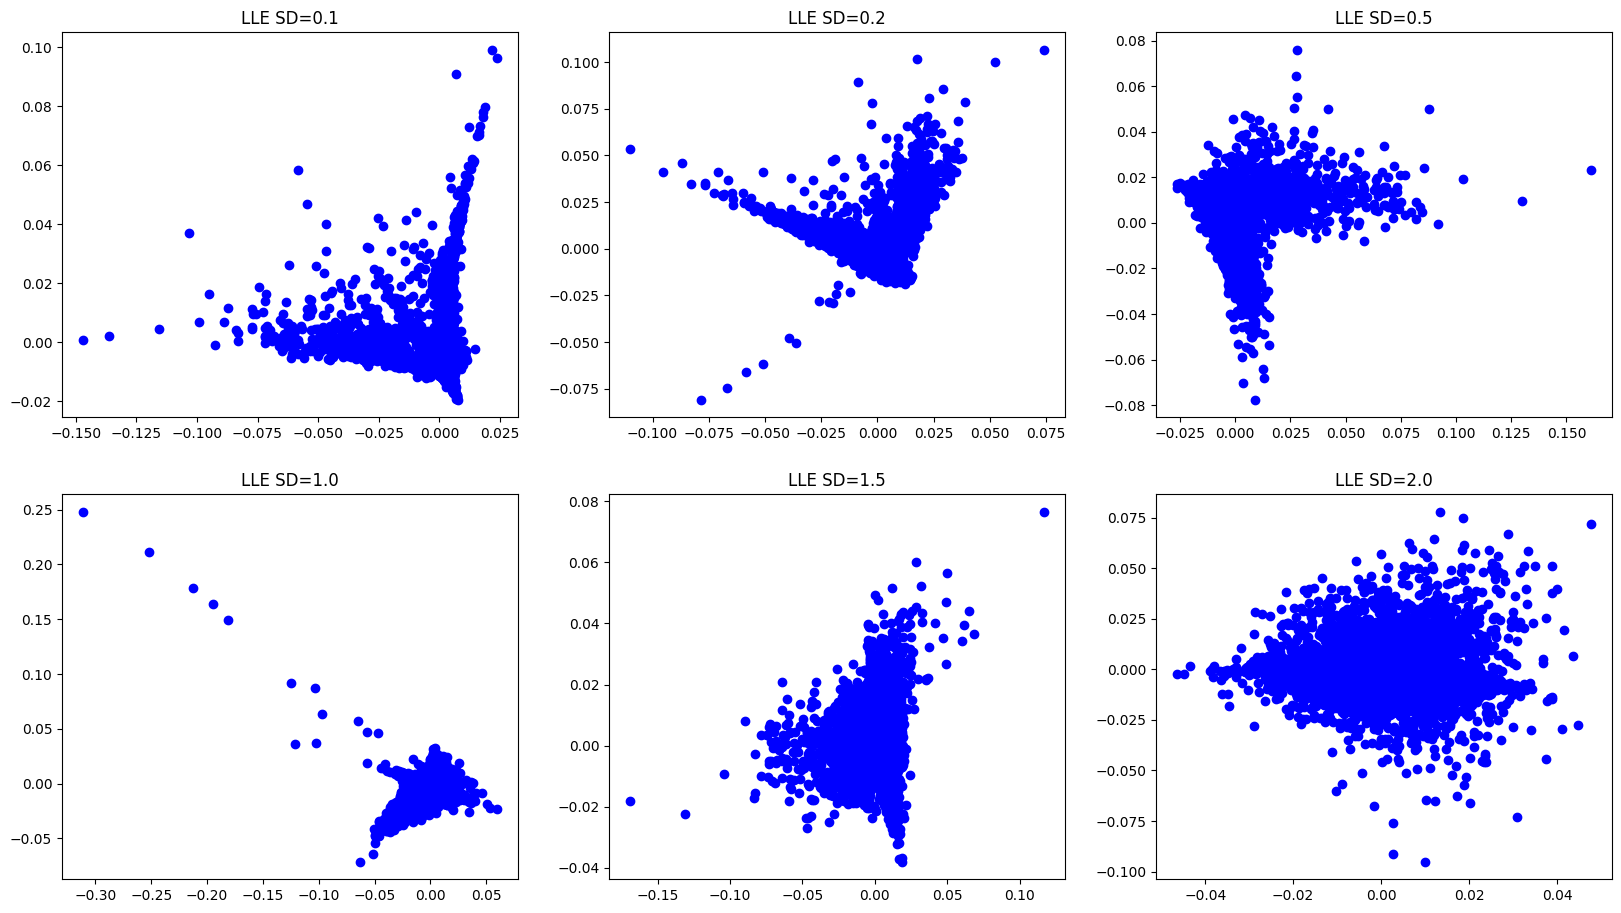

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd

B = X_transformedrOG
A_list = [X_transformedr01, X_transformedr02, X_transformedr05,X_transformedr10,X_transformedr15,X_transformedr20]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 11))

for i, ax in enumerate(axes.flatten()):
    A = A_list[i]

    # Plot original data and noisy data
    #ax.scatter(B.transpose()[:, 0], B.transpose()[:, 1], c='b')
    ax.scatter(A.transpose()[:, 0], A.transpose()[:, 1], c='b')
    if i == 0:
        ax.set_title("LLE SD=0.1")
    elif i == 1:
        ax.set_title("LLE SD=0.2")
    elif i == 2:
        ax.set_title("LLE SD=0.5")
    elif i == 3:
        ax.set_title("LLE SD=1.0")
    elif i == 4:
        ax.set_title("LLE SD=1.5")
    elif i == 5:
        ax.set_title("LLE SD=2.0")

plt.show()


In [24]:
num_neighbour=10

ISO: 43 sec


(-10031.468869445323, 10150.3358788158, -5196.687802281311, 8100.810237968158)

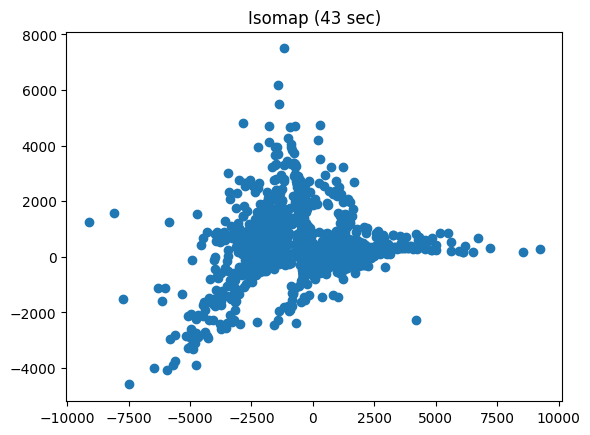

In [25]:
t0 = time()
trans_dataOG = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(dataOG)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_dataOG[0],trans_dataOG[1])
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
plt.axis("tight")

ISO: 44 sec


(-9907.588196561392, 10220.863645009327, -5625.064224133595, 8152.446225084118)

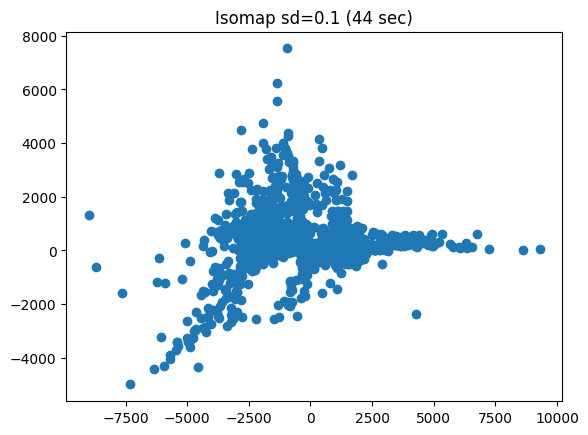

In [26]:
t0 = time()
trans_data01 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data0100)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data01[0],trans_data01[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=0.1", t1 - t0))
plt.axis("tight")

ISO: 42 sec


(-9742.760498431086, 10407.93938163496, -2330.1687760460845, 6955.913733544484)

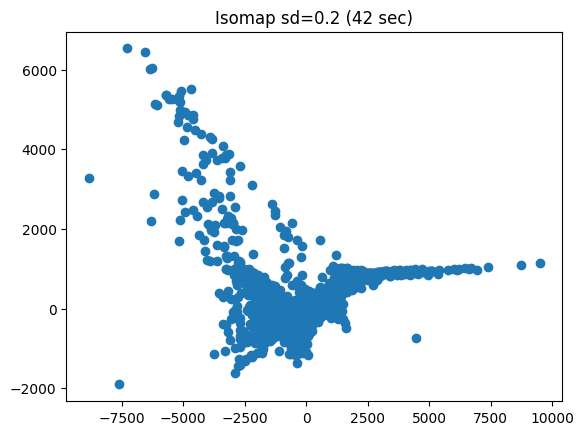

In [27]:
t0 = time()
trans_data02 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data0200)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data02[0],trans_data02[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=0.2", t1 - t0))
plt.axis("tight")

ISO: 41 sec


(-8744.021120087767,
 10033.825711513548,
 -3138.7761952774695,
 6318.091972318026)

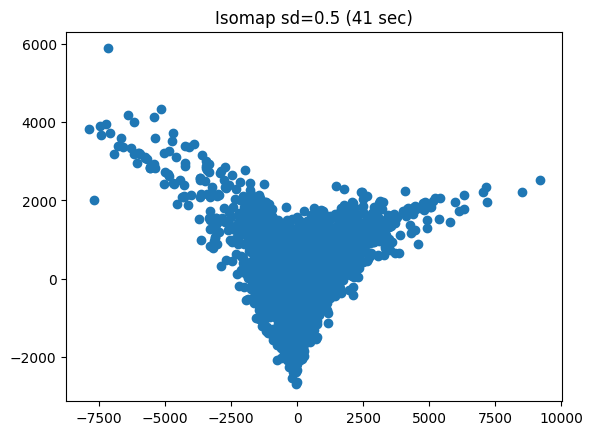

In [28]:
t0 = time()
trans_data05 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data0500)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data05[0],trans_data05[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=0.5", t1 - t0))
plt.axis("tight")

ISO: 42 sec


(-5271.345076529173, 7297.219180072193, -7728.760783478955, 8323.72113403876)

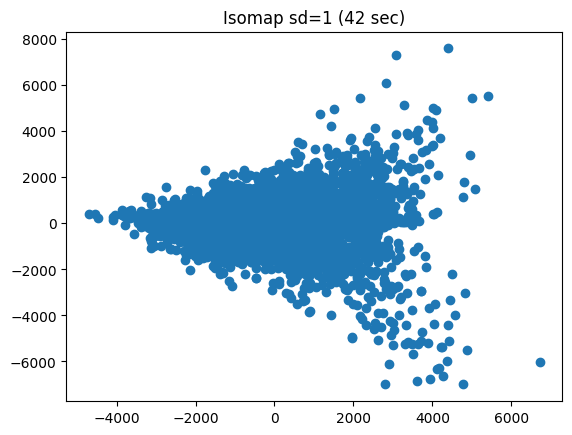

In [29]:
t0 = time()
trans_data10 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data1000)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data10[0],trans_data10[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=1", t1 - t0))
plt.axis("tight")

ISO: 41 sec


(-7451.358767975906, 8048.1603300236175, -7194.379129553518, 8028.908439372093)

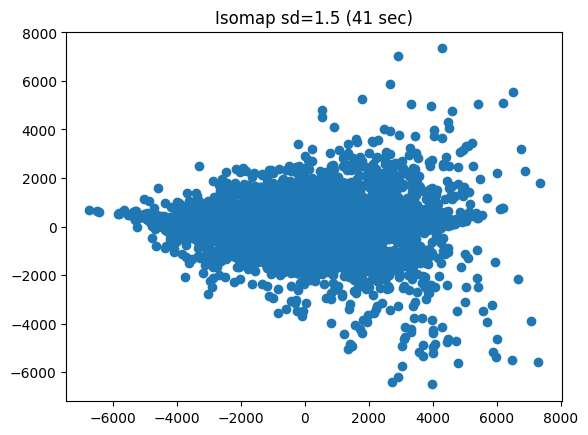

In [30]:
t0 = time()
trans_data15 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data1500)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data15[0],trans_data15[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=1.5", t1 - t0))
plt.axis("tight")

ISO: 40 sec


(-9676.326112373667, 10352.246872604555, -7192.232207556704, 7891.247417373203)

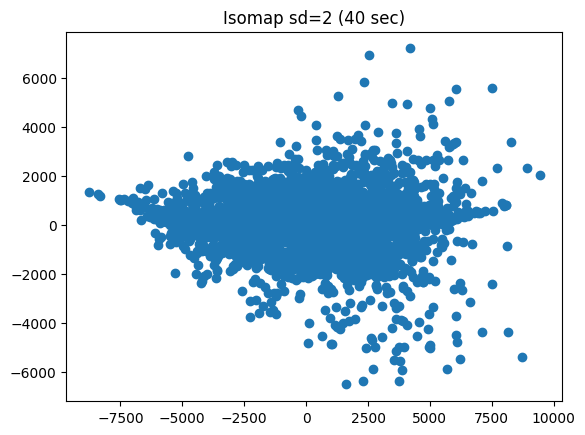

In [31]:
t0 = time()
trans_data20 = (
    manifold.Isomap(n_neighbors=num_neighbour, n_components=num_components)
    .fit_transform(data2000)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))
plt.scatter(trans_data20[0],trans_data20[1])
plt.title("%s (%.2g sec)" % ("Isomap sd=2", t1 - t0))
plt.axis("tight")

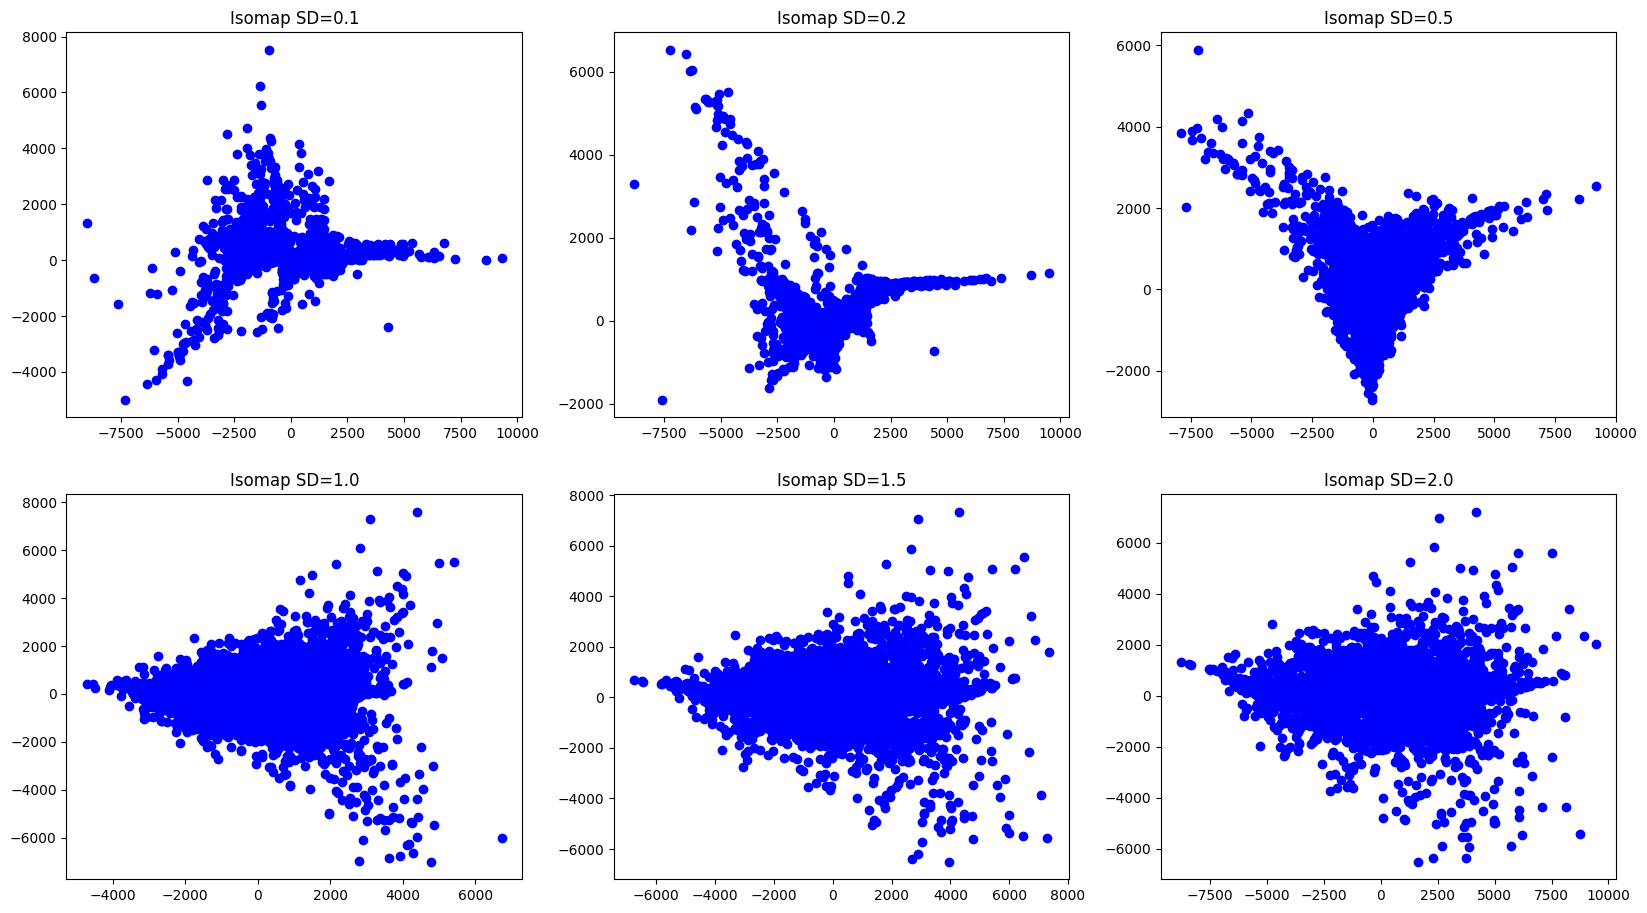

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd

# Define original data and list of noisy data
B = trans_dataOG
A_list = [trans_data01, trans_data02, trans_data05,trans_data10,trans_data15,trans_data20]

# Create figure with 2x3 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 11))

# Loop through each subplot and plot in subplots
for i, ax in enumerate(axes.flatten()):
    # Define noisy data to plot for current subplot
    A = A_list[i]

    # Plot original data and noisy data
    #ax.scatter(B.transpose()[:, 0], B.transpose()[:, 1], c='b')
    ax.scatter(A.transpose()[:, 0], A.transpose()[:, 1], c='b')
    if i == 0:
        ax.set_title("Isomap SD=0.1")
    elif i == 1:
        ax.set_title("Isomap SD=0.2")
    elif i == 2:
        ax.set_title("Isomap SD=0.5")
    elif i == 3:
        ax.set_title("Isomap SD=1.0")
    elif i == 4:
        ax.set_title("Isomap SD=1.5")
    elif i == 5:
        ax.set_title("Isomap SD=2.0")

plt.show()

Singular Value Decomposition Alignment

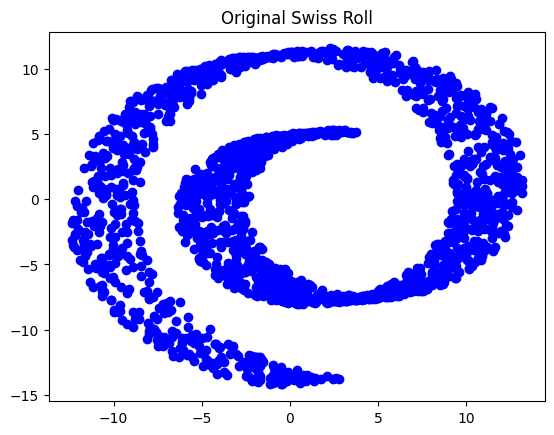

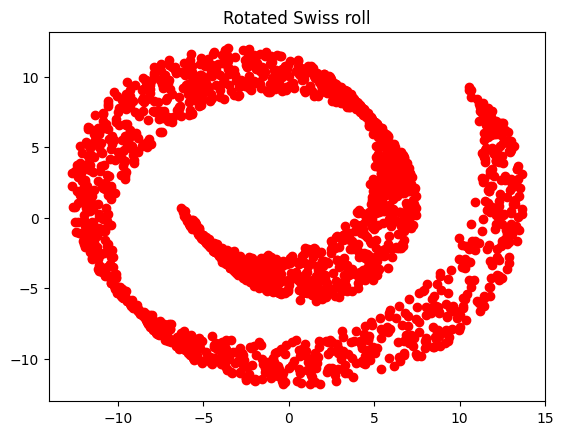

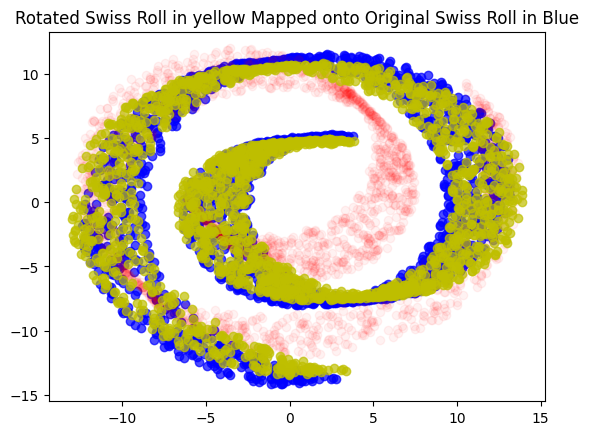

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll
# create random dataset A and rotate it by 45 degrees
data,_ = make_swiss_roll(2000,noise=0.05)


    # Compute PCA embedding
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

A=X_pca
rotation_angle = np.radians(120)
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

B = np.dot(A,rotation_matrix)

# calculate the rotation matrix using SVD
M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

plt.scatter(B[:,0], B[:,1], c='b')
plt.title("Original Swiss Roll")
plt.show()

plt.scatter(A[:,0], A[:,1], c='r')
plt.title("Rotated Swiss roll")
plt.show()


plt.scatter(B[:,0], B[:,1], c='b',alpha=0.7)
plt.scatter(A[:,0], A[:,1], c='r',alpha=0.05)
plt.scatter(new_A[:,0], new_A[:,1], c='y',alpha=0.7)

plt.title("Rotated Swiss Roll in yellow Mapped onto Original Swiss Roll in Blue")

plt.show()


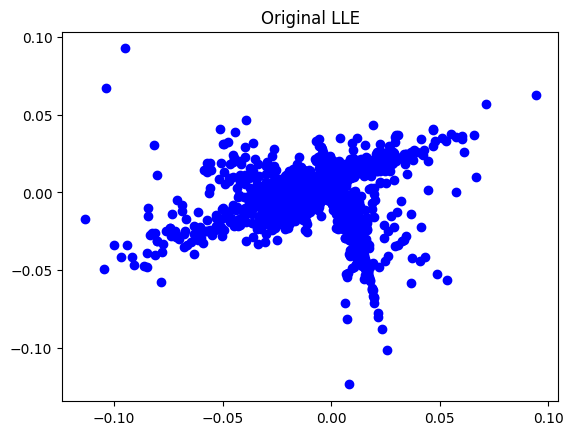

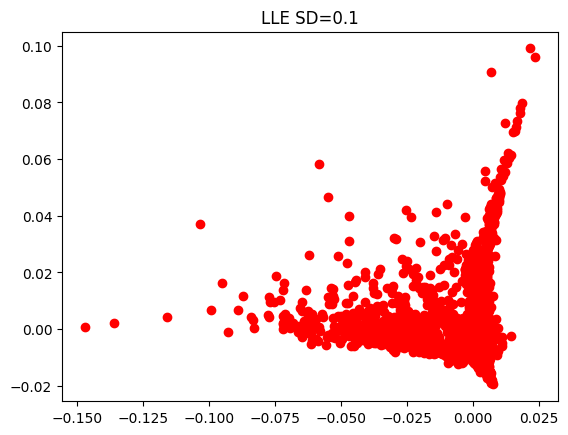

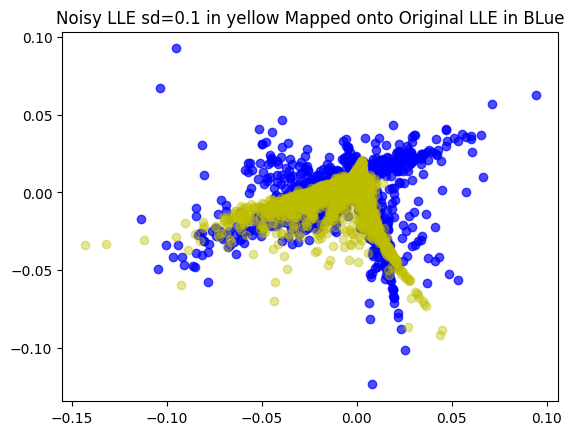

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr01  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=0.1")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=0.1 in yellow Mapped onto Original LLE in BLue")

plt.show()


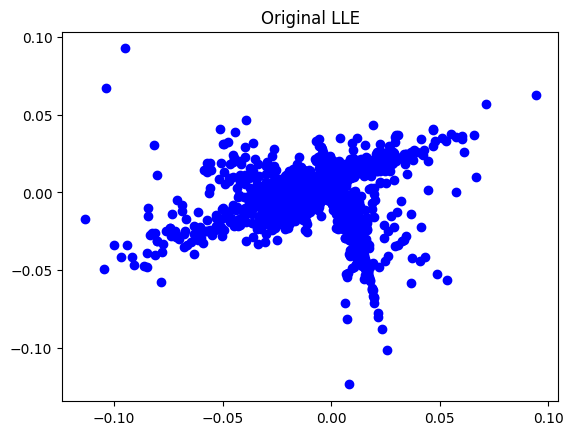

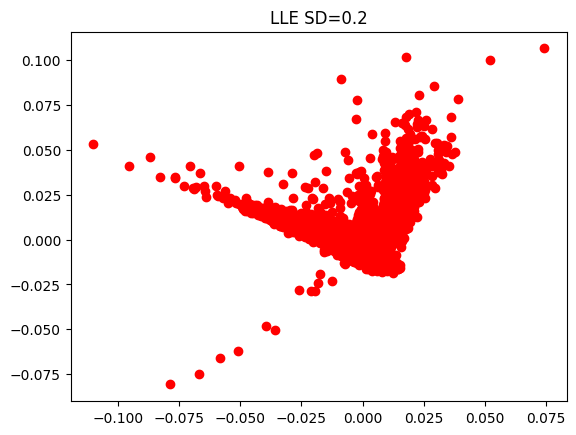

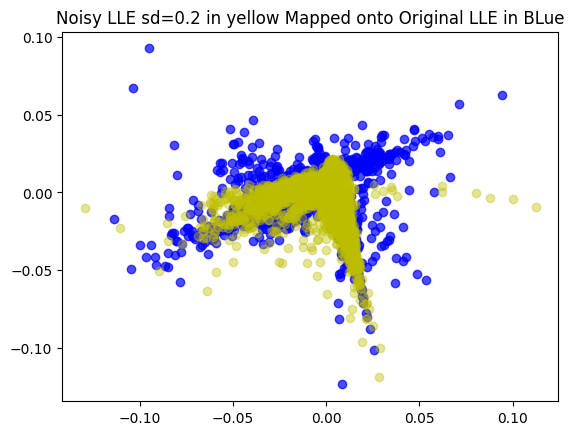

In [37]:
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr02  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=0.2")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=0.2 in yellow Mapped onto Original LLE in BLue")

plt.show()

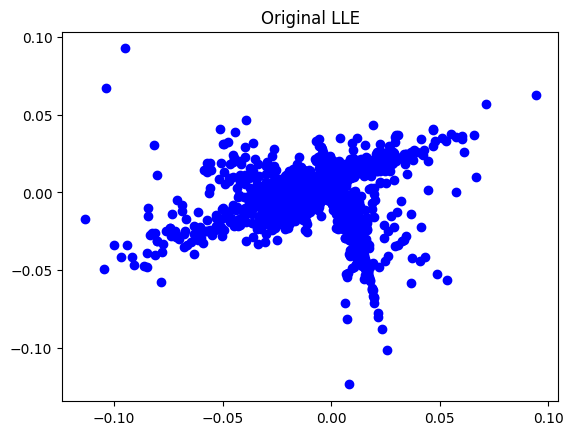

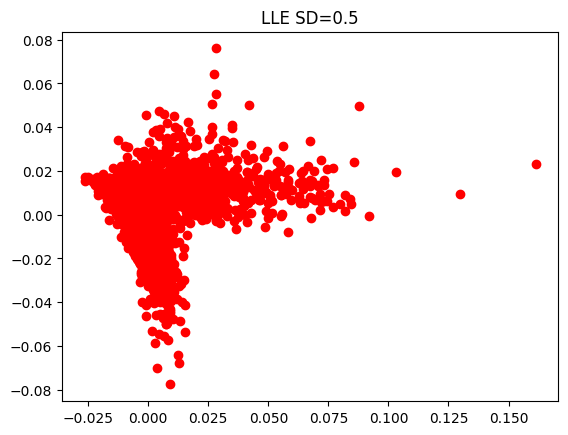

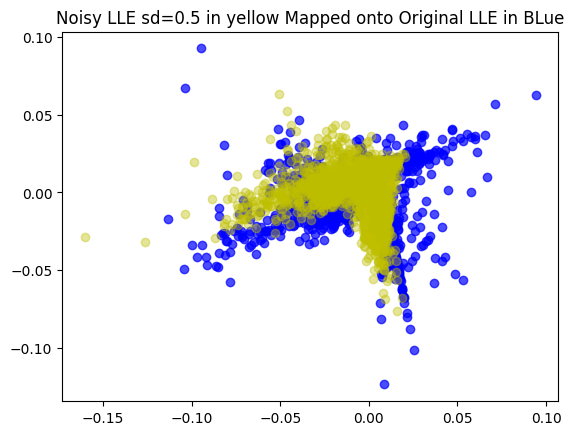

In [38]:
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr05  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=0.5")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=0.5 in yellow Mapped onto Original LLE in BLue")

plt.show()


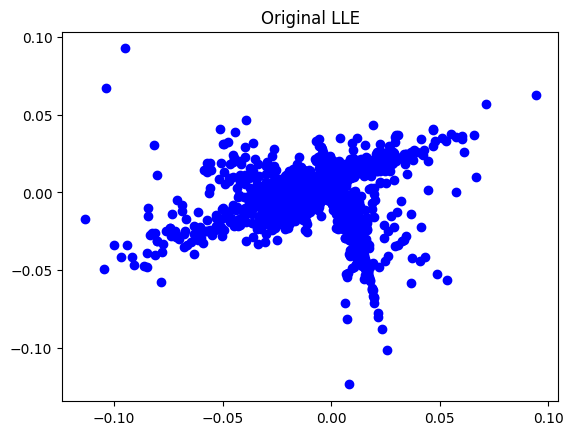

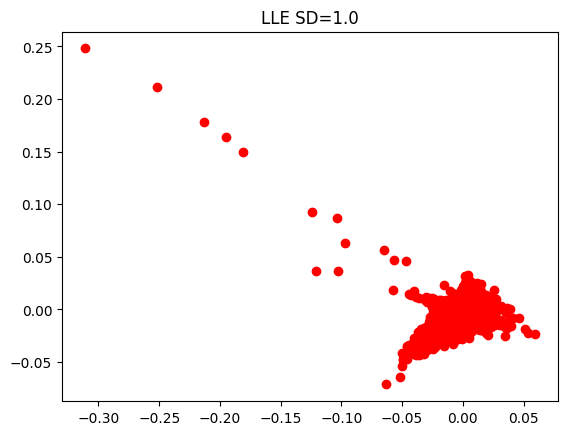

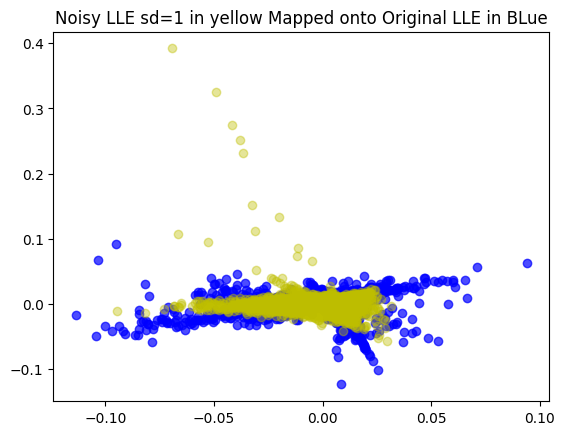

In [39]:
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr10  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=1.0")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=1 in yellow Mapped onto Original LLE in BLue")

plt.show()

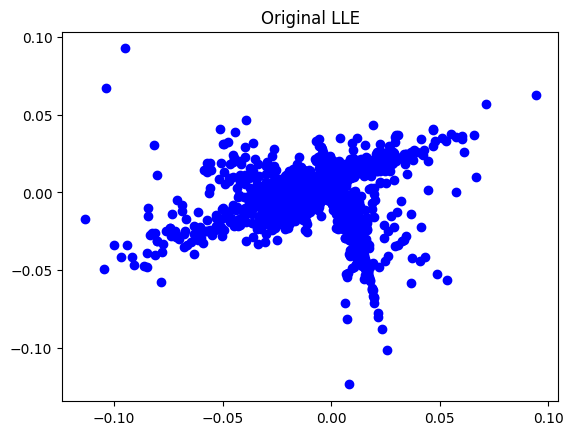

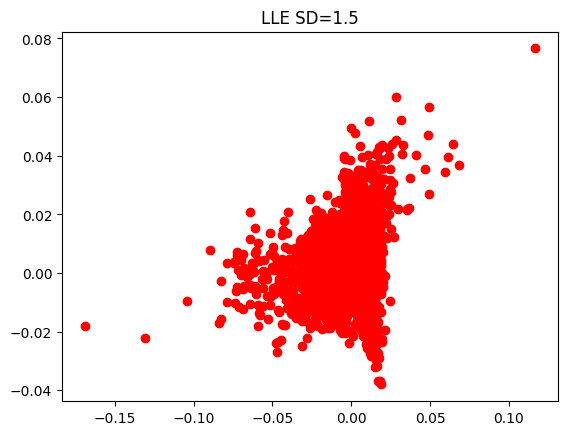

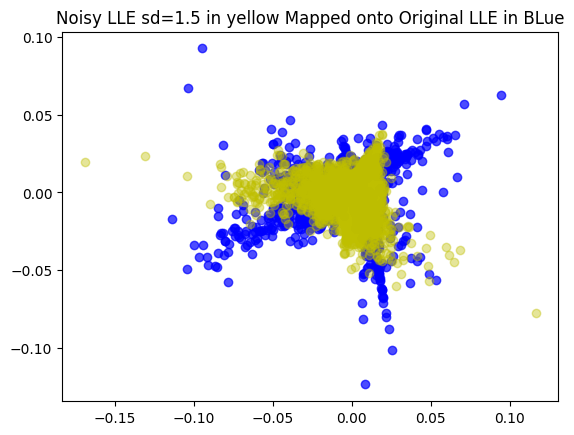

In [40]:
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr15  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=1.5")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=1.5 in yellow Mapped onto Original LLE in BLue")

plt.show()

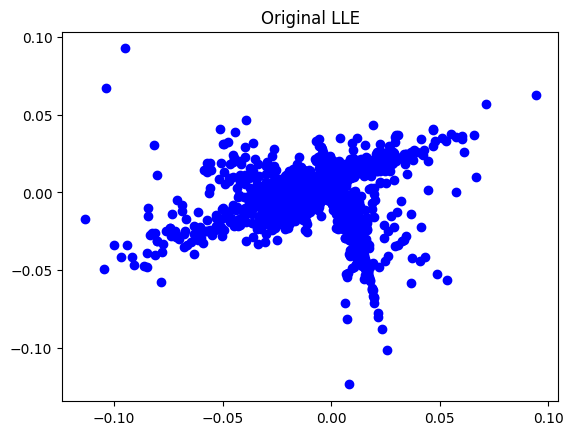

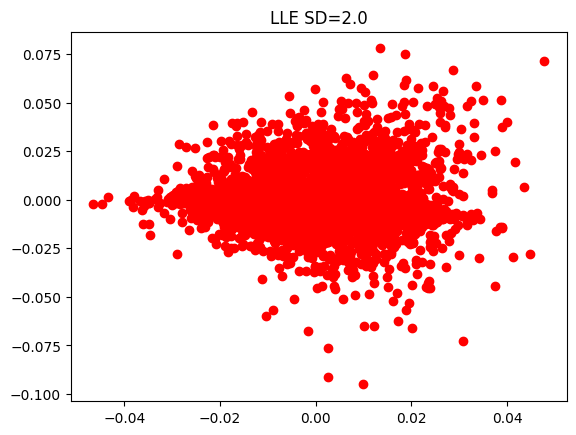

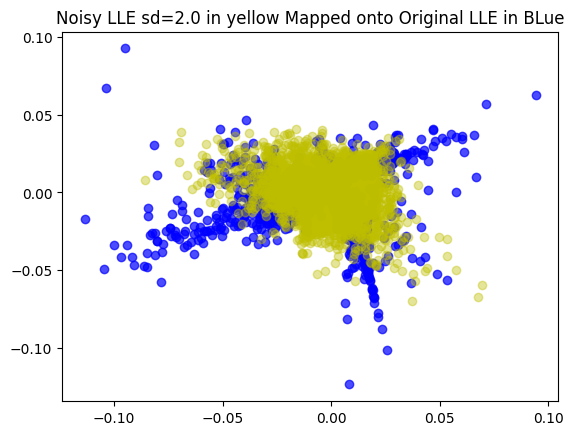

In [41]:
B=X_transformedrOG  ###B IS ORIGINAL
A=X_transformedr20  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original LLE")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("LLE SD=2.0")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy LLE sd=2.0 in yellow Mapped onto Original LLE in BLue")

plt.show()


Isomap SVD


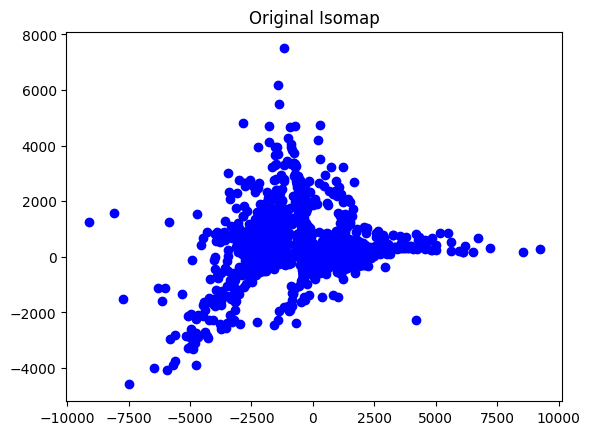

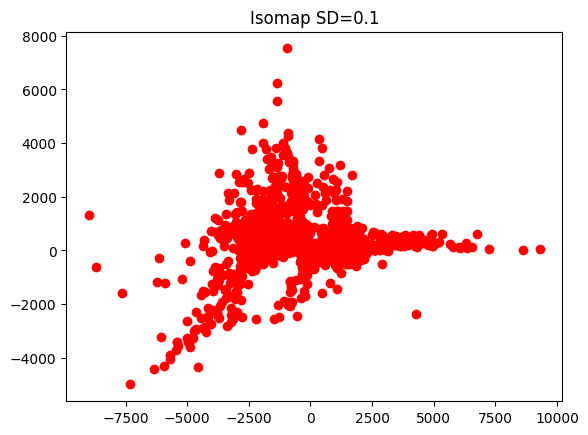

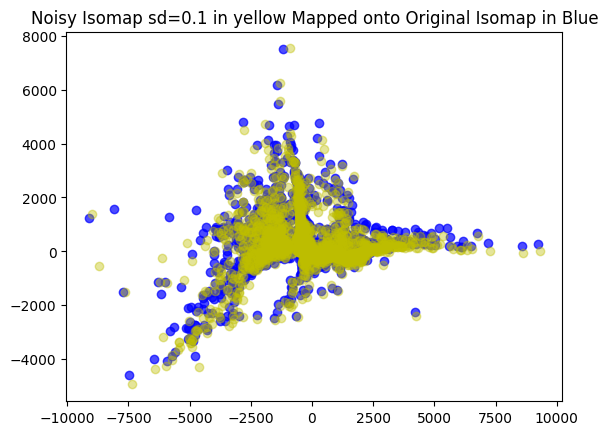

In [42]:
#Read data
B=trans_dataOG  ###B IS ORIGINAL
A=trans_data01  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=0.1")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=0.1 in yellow Mapped onto Original Isomap in Blue")

plt.show()

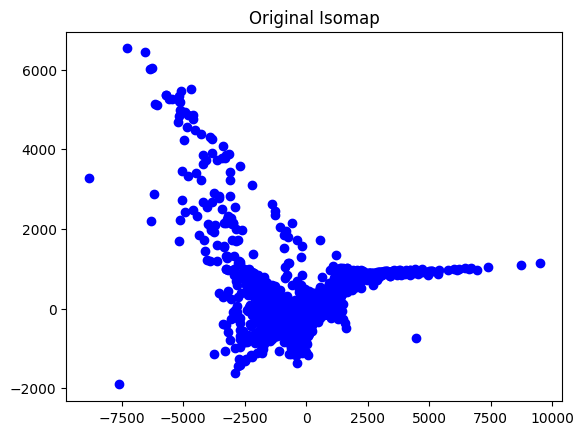

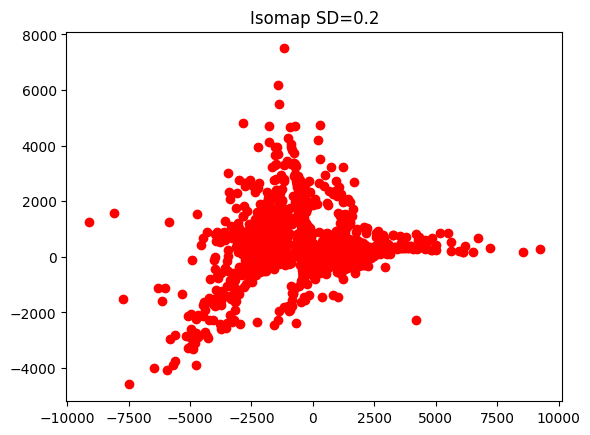

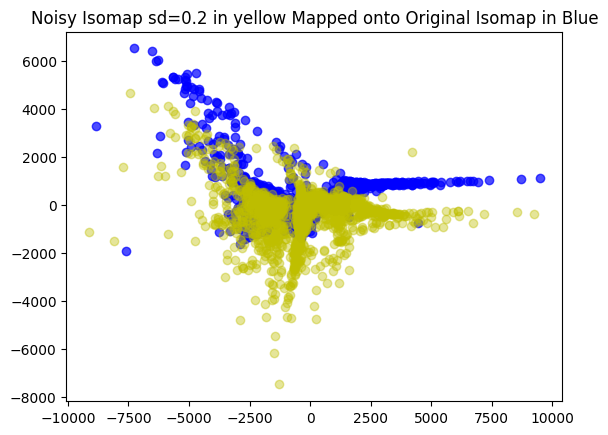

In [43]:
B=trans_data02  ###B IS ORIGINAL
A=trans_dataOG  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=0.2")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=0.2 in yellow Mapped onto Original Isomap in Blue")

plt.show()

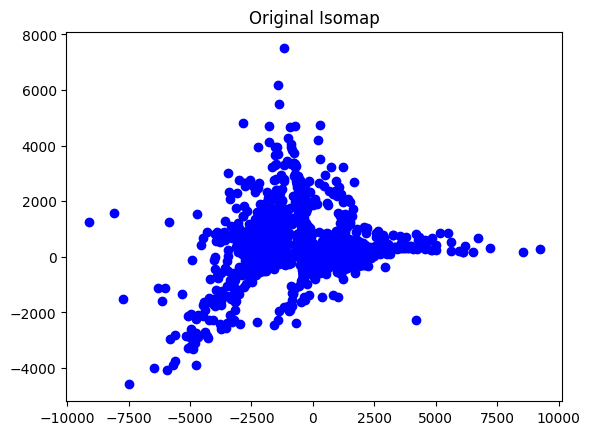

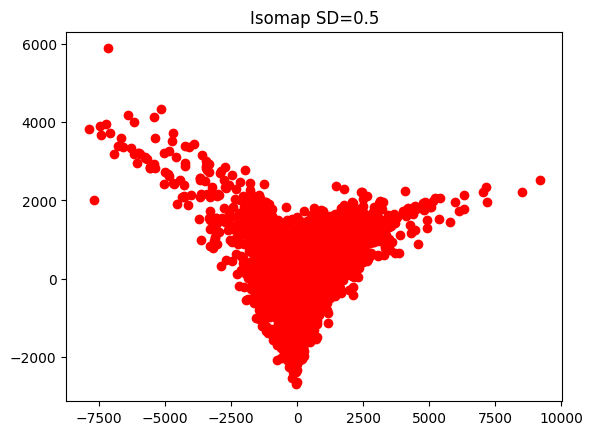

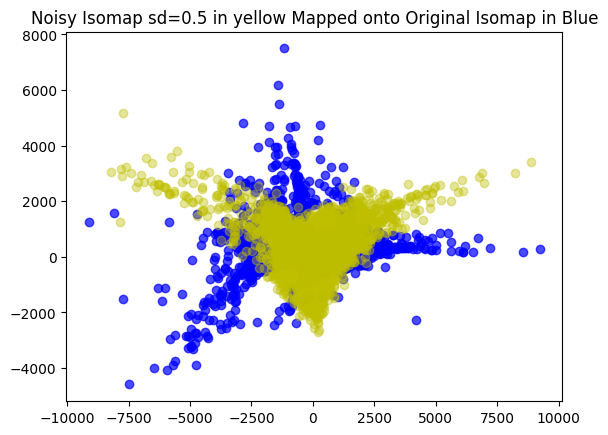

In [44]:
B=trans_dataOG  ###B IS ORIGINAL
A=trans_data05  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=0.5")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=0.5 in yellow Mapped onto Original Isomap in Blue")

plt.show()

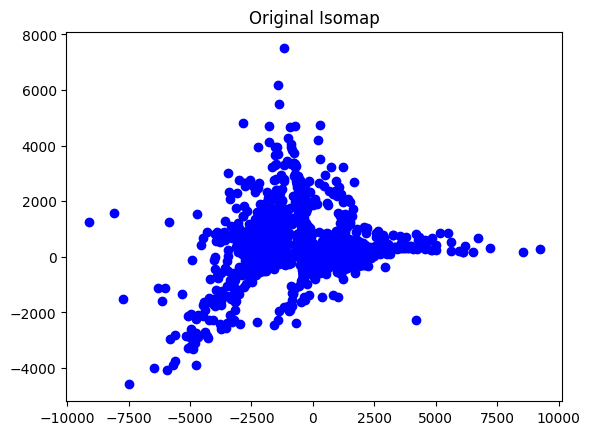

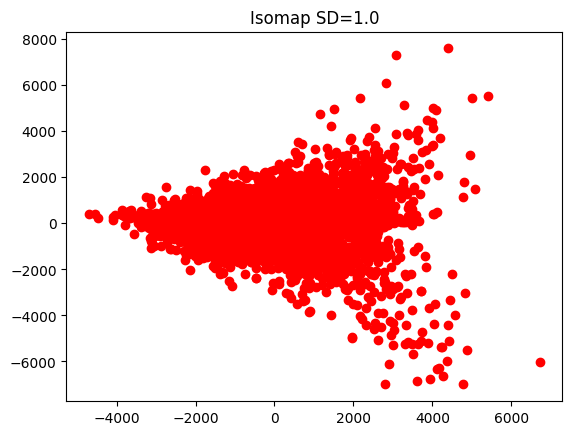

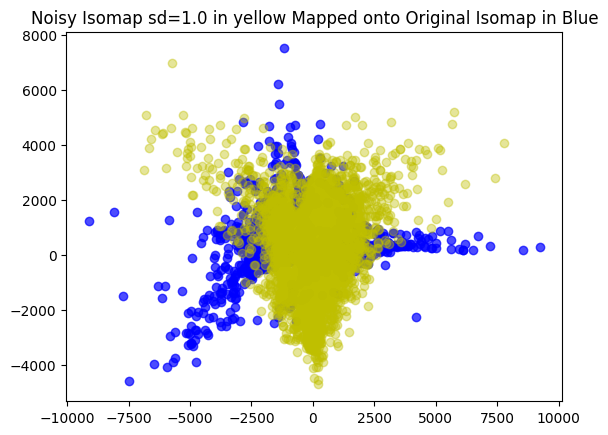

In [45]:
B=trans_dataOG  ###B IS ORIGINAL
A=trans_data10  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=1.0")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=1.0 in yellow Mapped onto Original Isomap in Blue")

plt.show()

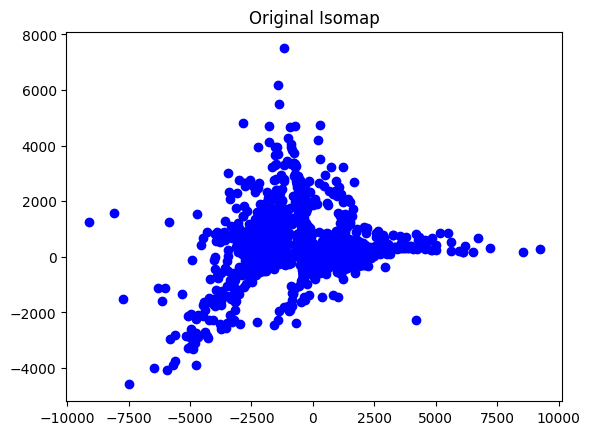

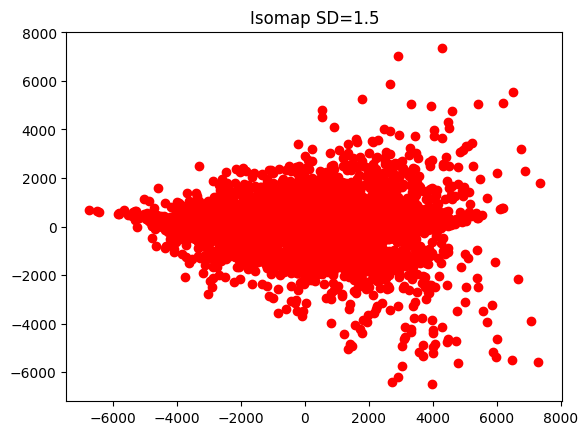

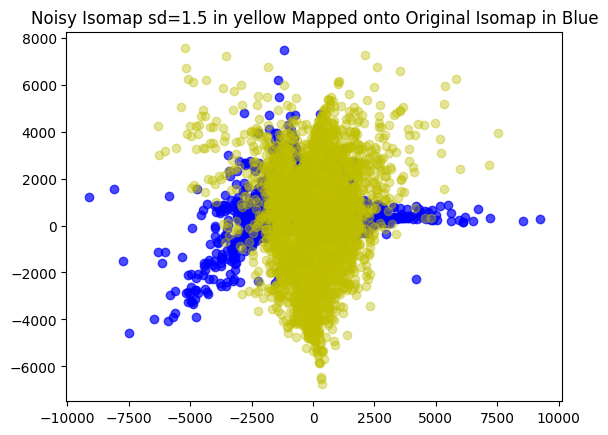

In [46]:
B=trans_dataOG  ###B IS ORIGINAL
A=trans_data15  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=1.5")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=1.5 in yellow Mapped onto Original Isomap in Blue")

plt.show()

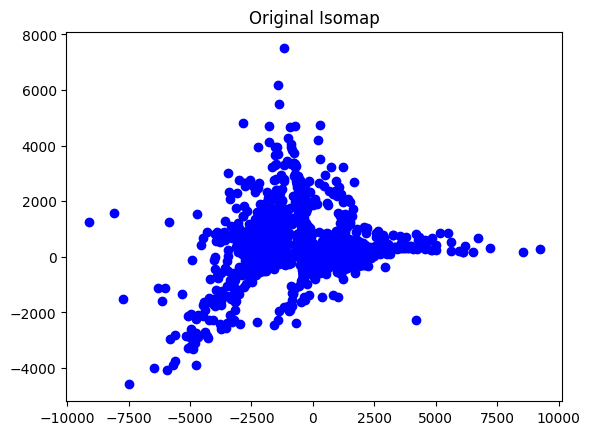

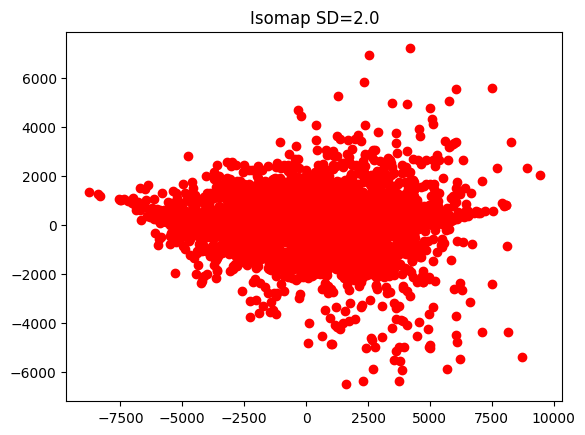

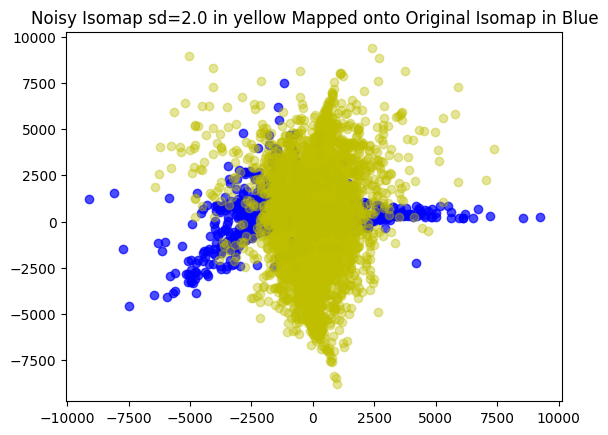

In [47]:
B=trans_dataOG  ###B IS ORIGINAL
A=trans_data20  ###A IS NOISY
#Plot


plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b')
plt.title("Original Isomap")
plt.show()

plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r')
plt.title("Isomap SD=2.0")
plt.show()
from numpy.linalg import svd

M=np.dot(B,A.transpose())
u,s,vh=svd(M)
R=np.dot(u,vh)

new_A=np.dot(R,A)

from matplotlib import pyplot as plt

plt.scatter(B.transpose()[:,0], B.transpose()[:,1], c='b',alpha=0.7)
#plt.scatter(A.transpose()[:,0], A.transpose()[:,1], c='r',alpha=0.5)
plt.scatter(new_A.transpose()[:,0], new_A.transpose()[:,1], c='y',alpha=0.4)

plt.title("Noisy Isomap sd=2.0 in yellow Mapped onto Original Isomap in Blue")

plt.show()